# Funnel Analysis

The company CEO isn't very happy with the volume of sales and, especially, of sales coming
from new users. Therefore, she asked you to investigate whether there is something wrong in
the conversion funnel or, in general, if you could suggest how conversion rate can be improved.
Specifically, she is interested in :

Specifically, she is interested in :
- A full picture of funnel conversion rate for both desktop and mobile
- Some insights on what the product team should focus on in order to improve
conversion rate as well as anything you might discover that could help improve
18
conversion rate.

Refer to [JifuZhao](https://github.com/JifuZhao/DS-Take-Home/blob/master/05.%20Funnel%20Analysis.ipynb)

## Import libraries and data


In [113]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

In [114]:
user_table = pd.read_csv('user_table.csv')

In [115]:
user_table.head(3)

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male


In [116]:
user_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  90400 non-null  int64 
 1   date     90400 non-null  object
 2   device   90400 non-null  object
 3   sex      90400 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [117]:
home_page_table = pd.read_csv('home_page_table.csv')

In [118]:
home_page_table.head(3)

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page


In [119]:
home_page_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  90400 non-null  int64 
 1   page     90400 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [120]:
search_page_table = pd.read_csv('search_page_table.csv')

In [121]:
search_page_table.head(3)

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page


In [122]:
search_page_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45200 entries, 0 to 45199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  45200 non-null  int64 
 1   page     45200 non-null  object
dtypes: int64(1), object(1)
memory usage: 706.4+ KB


In [123]:
payment_page_table = pd.read_csv('payment_page_table.csv')

In [124]:
payment_page_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  6030 non-null   int64 
 1   page     6030 non-null   object
dtypes: int64(1), object(1)
memory usage: 94.3+ KB


In [125]:
payment_confirmation_table = pd.read_csv('payment_confirmation_table.csv')

In [126]:
payment_confirmation_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  452 non-null    int64 
 1   page     452 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.2+ KB


In [127]:
payment_confirmation_table.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


### Data processing 

In [134]:
data = pd.merge(user_table, home_page_table, how = 'left', on ='user_id')
data = pd.merge(data, search_page_table, how = 'left', on ='user_id', suffixes=('_home', '_search'))
data = pd.merge(data, payment_page_table,  how = 'left',  on ='user_id')
data = pd.merge(data, payment_confirmation_table,  how = 'left', on ='user_id',suffixes=('_payment', '_confirmation'))
data.head(10)

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN
5,993454,2015-03-03,Desktop,Male,home_page,NaN,NaN,NaN
6,377150,2015-04-15,Desktop,Female,home_page,search_page,NaN,NaN
7,137258,2015-01-27,Mobile,Male,home_page,NaN,NaN,NaN
8,608249,2015-04-12,Desktop,Female,home_page,NaN,NaN,NaN
9,615615,2015-02-24,Mobile,Female,home_page,search_page,NaN,NaN


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            90400 non-null  int64 
 1   date               90400 non-null  object
 2   device             90400 non-null  object
 3   sex                90400 non-null  object
 4   page_home          90400 non-null  object
 5   page_search        45200 non-null  object
 6   page_payment       6030 non-null   object
 7   page_confirmation  452 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.2+ MB


### Q1:A full picture of funnel conversion rate for both desktop and mobile

In [136]:
conv_ratio = 1 - pd.DataFrame(data.isnull().sum()).rename(columns={0: 'conversion'}) / len(data)
conv_ratio = conv_ratio.reset_index()[4:]
conv_ratio

,index,conversion
4,page_home,1.000000
5,page_search,0.500000
6,page_payment,0.066704
7,page_confirmation,0.005000


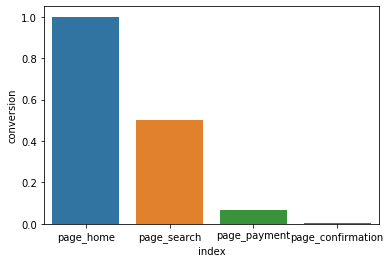

In [138]:
sns.barplot(x = 'index', y ='conversion', data=conv_ratio)

### Conversion Rate for Each Page

In [145]:
def conversion_rate(df):
    """ function to calculate conversion rates for home, search and payment page"""
    rates = []
    tmp = df[~df['page_home'].isnull()]
    rates.append(1 - tmp['page_search'].isnull().sum() / len(tmp))
    
    tmp = df[~df['page_search'].isnull()]
    rates.append(1 - tmp['page_payment'].isnull().sum() / len(tmp))
    
    tmp = df[~df['page_payment'].isnull()]
    rates.append(1 - tmp['page_confirmation'].isnull().sum() / len(tmp))
    
    return rates

#### 1. Overal

In [146]:
rates = conversion_rate(data)
names = ['home', 'search', 'payment']
maps = {'Page': ['home', 'search', 'payment'], 'Conversion Rate': rates}
overall_conv = pd.DataFrame(maps, columns=['Page', 'Conversion Rate'])

overall_conv


,Page,Conversion Rate
0,home,0.500000
1,search,0.133407
2,payment,0.074959


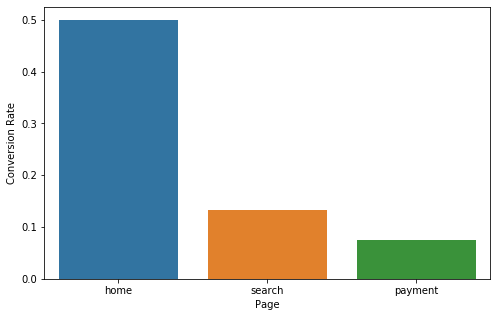

In [147]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate', data=overall_conv, ax=ax)
plt.show()

#### 2. Device

In [148]:
desk_rates = conversion_rate(data[data['device'] == 'Desktop'])
mobile_rates = conversion_rate(data[data['device'] == 'Mobile'])
names = ['home', 'search', 'payment']
print('{0:^10s} | {1:^10s} | {2:^10s}'.format('Page', 'Desktop', 'Mobile'))
print('-' * 40)
for name, desk_rate, mobile_rate in zip(names, desk_rates, mobile_rates):
    print('{0:10s} | {1:10.6f} | {2:10.6f}'.format(name, desk_rate, mobile_rate))

   Page    |  Desktop   |   Mobile  
----------------------------------------
home       |   0.500000 |   0.500000
search     |   0.100000 |   0.200000
payment    |   0.049834 |   0.100000


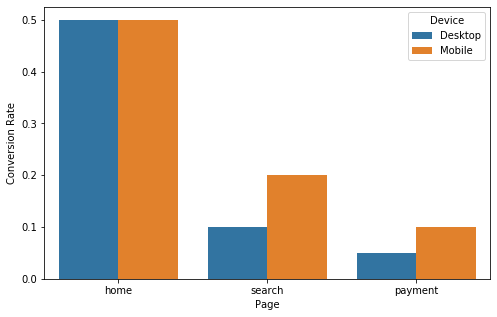

In [149]:
# Visualization
maps = {'Page': ['home', 'search', 'payment', 'home', 'search', 'payment'], 
        'Device': ['Desktop', 'Desktop', 'Desktop', 'Mobile', 'Mobile', 'Mobile'], 
        'Conversion Rate': desk_rates + mobile_rates}
device_conv = pd.DataFrame(maps, columns=['Page', 'Device', 'Conversion Rate'])

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate', data=device_conv, ax=ax, hue='Device')
plt.show()

#### 3. Sex

In [150]:
male_rates = conversion_rate(data[data['sex'] == 'Male'])
female_rates = conversion_rate(data[data['sex'] == 'Female'])
names = ['home', 'search', 'payment']
print('{0:^10s} | {1:^10s} | {2:^10s}'.format('Page', 'Male', 'Female'))
print('-' * 40)
for name, male_rate, female_rate in zip(names, male_rates, female_rates):
    print('{0:10s} | {1:10.6f} | {2:10.6f}'.format(name, male_rate, female_rate))

   Page    |    Male    |   Female  
----------------------------------------
home       |   0.496944 |   0.503073
search     |   0.130083 |   0.136708
payment    |   0.072014 |   0.077742


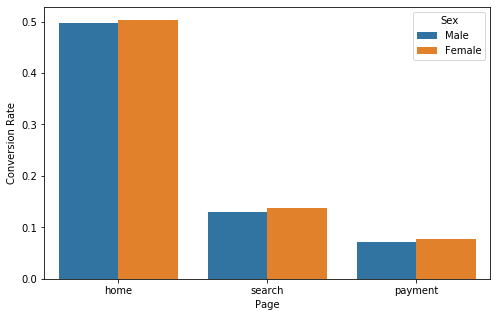

In [151]:
# Visualization
maps = {'Page': ['home', 'search', 'payment', 'home', 'search', 'payment'], 
        'Sex': ['Male', 'Male', 'Male', 'Female', 'Female', 'Female'], 
        'Conversion Rate': male_rates + female_rates}
sex_conv = pd.DataFrame(maps, columns=['Page', 'Sex', 'Conversion Rate'])

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate', data=sex_conv, ax=ax, hue='Sex')
plt.show()